In [25]:
#importing relevant packages
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [26]:
#dictionary with parish names as keys and device ids as values
parish_sensor_dict = {'NTINDA':930434, 'BUGOLOBI':718028, 'NANTABULIRWA':912224, 'KIREKA':930426, 'LUWAFU':930427, 
                     'BANDA':912223, 'MBUYA II':912222, 'NAKASERO II':912220, 'KIWATULE':870145, 'KYALIWAJJALA':870143,
                     'BUTABIKA':870144, 'NANSANA WEST':870147, 'NANSANA EAST':870142, 'BUSEGA':870139, 'KYANJA':832255,
                     'BUSABALA':832252, 'BUNAMWAYA':832253, 'KYEBANDO':832254, 'LUKULI':832251, 'BUKOTO I':782720,
                     'KANSANGA':782719, 'KASUBI':782718, 'NAGURU II':755614, 'MAKINDYE I':755612,
                     'MAKERERE UNIVERSITY':870146, 'LUBAGA':737276, 'BWEYOGERERE':737273, 'CIVIC CENTRE':689761}

In [27]:
def preprocessing(parish):
    '''
    Collects and preprocesses data
    '''
    channel_id = parish_sensor_dict[parish]
    
    filepath = r'D:/AirQo/sensor location model/feeds/'+str(channel_id)+'.csv'
    cols = ['created_at', 'field1']
    data = pd.read_csv(filepath,  parse_dates = ['created_at'], usecols=cols)
    
    data.set_index('created_at', inplace=True)
    hourly_data = data.resample('H').mean().round(2)  
    final_data=hourly_data.dropna()
    
    name = parish+'_pm2_5'
    final_data.rename(columns = {'field1': name}, inplace = True)
    print (parish, ':done')
    
    return final_data

In [28]:
def merge_dfs(df_list):
    '''
    Merges several dataframes into one based on the index
    '''
    from functools import reduce
    final_df = reduce(lambda left,right: pd.merge(left,right,on='created_at'), df_list)
    return final_df

In [29]:
def find_correlation(data, column1, column2):
    '''
    Finds the correlation between 2 different columns in a dataframe
    '''
    correlation = data[column1].corr(data[column2])
    return correlation

In [30]:
def correlation_matrix_1(df):
    return df.corr()

In [31]:
def correlation_matrix_2(df):
    import seaborn as sns
    
    plt.figure(figsize=(5,5))
    sns.heatmap(correlation_matrix_1(df), annot=True, cmap=plt.cm.Reds)
    plt.show()

In [32]:
def correlation_matrix_3(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(5,5))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(correlation_matrix_1(df), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Correlation Matrix')
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

In [33]:
def correlation_matrix_4(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    f = plt.figure(figsize=(5,5))
    plt.matshow(correlation_matrix_1(df), fignum=f.number)
    plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
    plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title('Correlation Matrix', fontsize=16)

In [34]:
data = pd.read_csv('gp_data.csv')
data.shape

(28, 50)

In [35]:
all_df_list = []
for parish in data.parish:
    df = preprocessing(parish)
    all_df_list.append(df)

NANTABULIRWA :done
KIWATULE :done
NTINDA :done
BUKOTO I :done
BUGOLOBI :done
BUTABIKA :done
KYANJA :done
BANDA :done
MBUYA II :done
NAGURU II :done
BUSEGA :done
KASUBI :done
LUBAGA :done
NAKASERO II :done
CIVIC CENTRE :done
MAKERERE UNIVERSITY :done
BUSABALA :done
NANSANA WEST :done
NANSANA EAST :done
LUKULI :done
LUWAFU :done
KANSANGA :done
MAKINDYE I :done
BUNAMWAYA :done
KYALIWAJJALA :done
KIREKA :done
BWEYOGERERE :done
KYEBANDO :done


In [36]:
len(all_df_list)

28

In [37]:
all_df_list[25].columns

Index(['KIREKA_pm2_5'], dtype='object')

In [38]:
def remove_element(myList, index):
    myList.pop(index)
    print ('The new list length is ', len(myList))

In [39]:
remove_element(all_df_list, 25)

The new list length is  27


In [40]:
remove_element(all_df_list, 20)

The new list length is  26


In [41]:
remove_element(all_df_list, 2)

The new list length is  25


In [42]:
remove_element(all_df_list, 0)

The new list length is  24


In [43]:
merged_df = merge_dfs(all_df_list)
merged_df.shape

(8, 24)

In [44]:
merged_df

,KIWATULE_pm2_5,BUKOTO I_pm2_5,BUGOLOBI_pm2_5,BUTABIKA_pm2_5,KYANJA_pm2_5,BANDA_pm2_5,MBUYA II_pm2_5,NAGURU II_pm2_5,BUSEGA_pm2_5,KASUBI_pm2_5,...,BUSABALA_pm2_5,NANSANA WEST_pm2_5,NANSANA EAST_pm2_5,LUKULI_pm2_5,KANSANGA_pm2_5,MAKINDYE I_pm2_5,BUNAMWAYA_pm2_5,KYALIWAJJALA_pm2_5,BWEYOGERERE_pm2_5,KYEBANDO_pm2_5
created_at,,,,,,,,,,,,,,,,,,,,,
2019-11-28 10:00:00+00:00,29.61,54.73,16.67,11.82,33.62,31.15,57.58,29.60,34.35,39.51,...,3.07,52.66,23.30,34.49,54.84,30.34,30.02,40.15,33.10,64.00
2019-11-28 11:00:00+00:00,25.45,31.25,20.03,20.37,28.34,25.98,16.58,27.06,71.97,47.62,...,10.09,49.99,34.33,28.91,13.06,29.56,41.58,31.44,33.48,91.97
2019-11-28 12:00:00+00:00,30.56,30.70,27.04,26.71,29.04,30.53,32.87,25.22,100.24,73.45,...,9.68,41.41,45.44,26.78,24.58,25.70,29.28,43.91,34.62,47.15
2019-11-28 13:00:00+00:00,37.10,53.62,24.29,20.52,24.07,30.69,28.96,20.36,89.05,35.49,...,11.62,28.91,41.24,22.06,20.74,19.70,29.98,32.87,37.62,48.08
2019-11-28 14:00:00+00:00,38.13,48.33,17.72,28.45,23.78,22.21,15.19,26.74,32.41,57.72,...,5.30,55.02,17.93,22.31,17.57,22.64,35.92,270.75,39.44,76.90
2019-11-28 15:00:00+00:00,142.76,30.74,15.98,15.12,40.79,23.44,22.25,23.11,67.21,59.22,...,10.47,64.84,31.44,24.40,29.63,42.87,32.88,115.84,68.54,114.20
2019-11-29 10:00:00+00:00,41.43,43.41,26.82,17.53,40.02,37.89,42.71,41.83,28.47,43.02,...,7.28,131.53,44.48,26.85,26.45,29.55,31.46,44.69,27.56,144.65
2019-11-29 11:00:00+00:00,24.10,31.60,22.07,14.32,24.70,21.07,28.45,26.79,69.11,44.87,...,7.23,52.15,51.89,37.64,16.81,31.16,36.30,33.47,32.33,57.83


In [45]:
correlation_matrix_1(merged_df)

,KIWATULE_pm2_5,BUKOTO I_pm2_5,BUGOLOBI_pm2_5,BUTABIKA_pm2_5,KYANJA_pm2_5,BANDA_pm2_5,MBUYA II_pm2_5,NAGURU II_pm2_5,BUSEGA_pm2_5,KASUBI_pm2_5,...,BUSABALA_pm2_5,NANSANA WEST_pm2_5,NANSANA EAST_pm2_5,LUKULI_pm2_5,KANSANGA_pm2_5,MAKINDYE I_pm2_5,BUNAMWAYA_pm2_5,KYALIWAJJALA_pm2_5,BWEYOGERERE_pm2_5,KYEBANDO_pm2_5
KIWATULE_pm2_5,1.000000,-0.281593,-0.442642,-0.235808,0.631374,-0.229490,-0.222964,-0.223474,0.020301,0.278347,...,0.323617,0.145300,-0.197141,-0.363426,0.132597,0.751270,-0.122338,0.251044,0.950944,0.453374
BUKOTO I_pm2_5,-0.281593,1.000000,-0.114911,-0.048467,-0.153785,0.383439,0.459732,0.099205,-0.468015,-0.589076,...,-0.455340,-0.019714,-0.461533,-0.192326,0.467039,-0.536128,-0.425168,0.172418,-0.280213,-0.157907
BUGOLOBI_pm2_5,-0.442642,-0.114911,1.000000,0.303310,-0.102553,0.593276,0.150684,0.307868,0.374752,0.060931,...,0.362089,0.238046,0.771497,-0.088559,-0.332410,-0.464898,-0.330084,-0.467640,-0.563249,-0.052635
BUTABIKA_pm2_5,-0.235808,-0.048467,0.303310,1.000000,-0.481176,-0.087438,-0.548853,-0.198239,0.237841,0.585630,...,0.217400,-0.223388,-0.147714,-0.636560,-0.545210,-0.605160,0.077534,0.528596,-0.117614,-0.228758
KYANJA_pm2_5,0.631374,-0.153785,-0.102553,-0.481176,1.000000,0.434193,0.392371,0.508825,-0.340556,0.062452,...,-0.031993,0.693660,-0.036419,-0.027317,0.484247,0.733215,-0.282295,-0.159727,0.390659,0.776064
BANDA_pm2_5,-0.229490,0.383439,0.593276,-0.087438,0.434193,1.000000,0.669242,0.601843,-0.158589,-0.256376,...,-0.026584,0.514153,0.216500,-0.131365,0.381602,-0.239238,-0.580682,-0.464739,-0.447523,0.298979
MBUYA II_pm2_5,-0.222964,0.459732,0.150684,-0.548853,0.392371,0.669242,1.000000,0.463932,-0.318944,-0.358096,...,-0.525233,0.285337,0.068419,0.457039,0.845044,0.029582,-0.654672,-0.483082,-0.372549,-0.008459
NAGURU II_pm2_5,-0.223474,0.099205,0.307868,-0.198239,0.508825,0.601843,0.463932,1.000000,-0.683136,-0.202873,...,-0.458175,0.915076,0.112871,0.220569,0.189489,0.086320,-0.033695,-0.111767,-0.489956,0.684285
BUSEGA_pm2_5,0.020301,-0.468015,0.374752,0.237841,-0.340556,-0.158589,-0.318944,-0.683136,1.000000,0.332269,...,0.782947,-0.636689,0.532708,-0.114246,-0.378143,-0.115547,-0.082833,-0.421741,0.156949,-0.551737
KASUBI_pm2_5,0.278347,-0.589076,0.060931,0.585630,0.062452,-0.256376,-0.358096,-0.202873,0.332269,1.000000,...,0.174708,-0.124254,-0.039116,-0.267564,-0.188585,0.174514,-0.047682,0.365364,0.343837,-0.070935


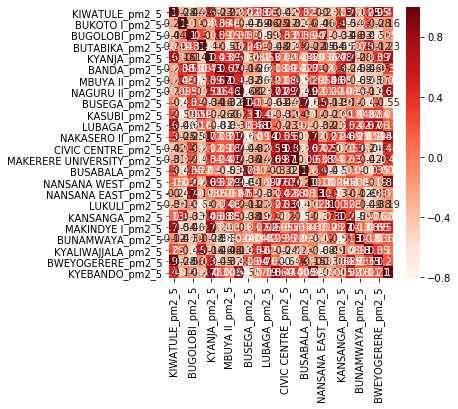

In [48]:
import matplotlib.pyplot as plt
correlation_matrix_2(merged_df)

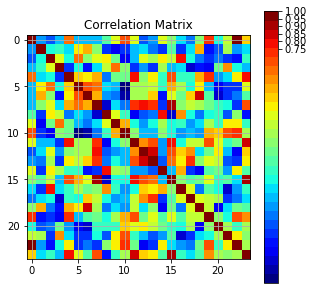

In [49]:
correlation_matrix_3(merged_df)

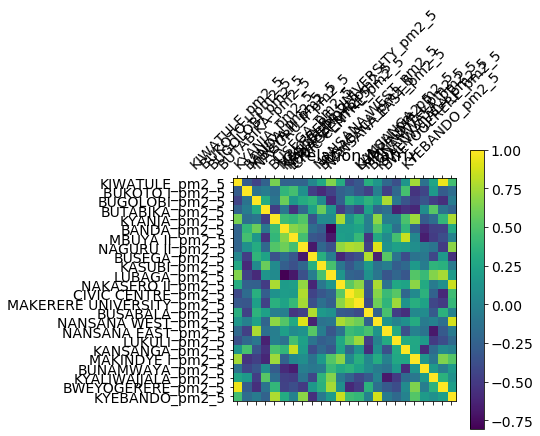

In [50]:
correlation_matrix_4(merged_df)